<a href="https://colab.research.google.com/github/vkvinay0627/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Bikes are one of the better options in today's globe, when everyone is deciding to switch to clean fuel alternatives like EVs and solar-powered automobiles.
We have a data set of bike sharing in this project, and we must predict the number of bikes required at a certain time.

What we are doing in this Kernel is something like - 




1. <b>Understand the problem</b>. We'll look at each variable and do an analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

#**Loading and Understanding DataBase** 


## Loading Dataset

In [66]:
import pandas as pd
import numpy as np
from numpy import *
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
from scipy import signal
from matplotlib import *
from pandas import DataFrame
import datetime as dt
import os
from pandas import DataFrame
from ipywidgets import interact, interactive, fixed, interact_manual 
plt.style.use('fivethirtyeight')
from google.colab import files

import datetime as dt
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, IntSlider, interactive, widgets, interact_manual,HBox,fixed
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/SeoulBikeData.csv", encoding= 'unicode_escape')


## Understanding Data

In [69]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [70]:
# statistical info
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:
* <b>Variable</b> - Variable name.
* <b>Type</b> - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* <b>Expectation</b> - Our expectation about the variable influence in 'Rented Bike Count'.
* <b>Conclusion</b> - Our conclusions about the importance of the variable, after we give a quick look at the data. 
* <b>Comments</b> - Any general comments that occured to us.

In [71]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



*   Our DataFrame has **8750** records and **14** columns, as we can see.



In [72]:
# unique values
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [73]:
# Categorical Columns
Categorical_columns = df.iloc[:,:]
discrete = []
for var in Categorical_columns:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} Categorical columns'.format(len(discrete)))

Seasons  values:  ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday  values:  ['No Holiday' 'Holiday']
Functioning Day  values:  ['Yes' 'No']
There are 3 Categorical columns






*   **Seasons**, **Holidays**, and **Functioning Day** are categorical columns, while the others are numerical ones, as seen in the above result.





In [74]:
# check for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64



*   No missing values are present in our Data.



In [75]:
df.Date = pd.to_datetime(df.Date)



*   We have a date column in our dataset, which consists of the day, month, and year. By extracting these features from the date column, We can see the daily and monthly trends in EDA.



In [76]:
df['day'] = df['Date'].dt.day
df['month_name'] = df['Date'].dt.month_name()
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.day_name()
# df['weekday_num'] = df['Date'].dt.weekday
df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month_name,month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,January,1,Thursday


In [77]:
# Renaming of some columns' names for easy use in the future
df= df.rename(columns={'Temperature(°C)':'Temp',
                       'Wind speed (m/s)':'Windspeed',
                       'Humidity(%)':'humidity',
                       'Rainfall(mm)' : 'Rainfall',
                       'Snowfall(Cm)' : 'Snowfall'})

In [78]:
df.describe()

,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall (cm),day,month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000


* All of our columns were found to be normal, with maximum and minimum values in ranges. However, we can identify certain outliers in the Rented bike Count, which we can improve on.

*   Prior to delving into the data. Let's start by looking at our dependent variable and its skewedness.



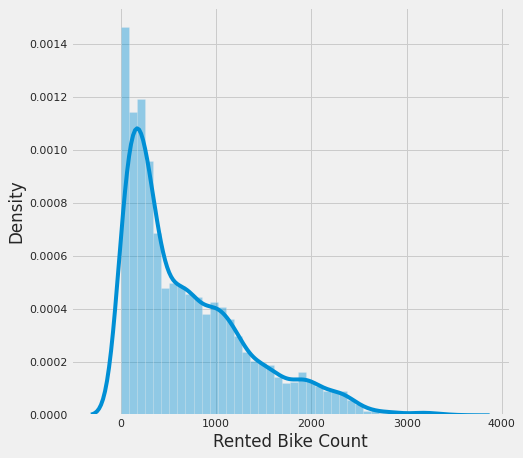

In [79]:
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'])

**Observation** - 

*   It appears to be heavily biassed i.e. Positively Skewed.

To convert data to a normal distribution, we must do a log or square root transformation, which involves replacing a dependent variable with its square root or logarithm.


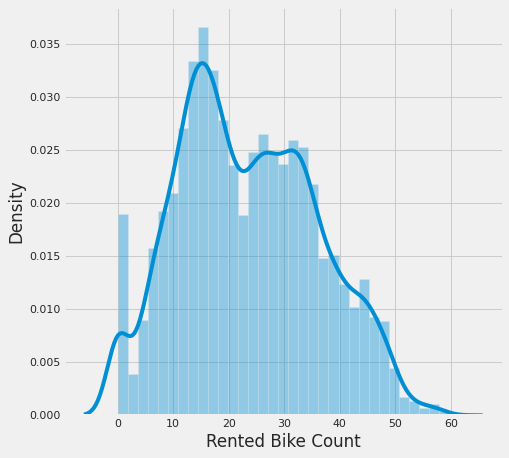

In [80]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']))
df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])

#**Exploratory Data Analysis**

##Uni-variate Analysis

In Univariate Analysis, we will first separate the columns on the basis of numerical features and categorical features and then do their count distribution.

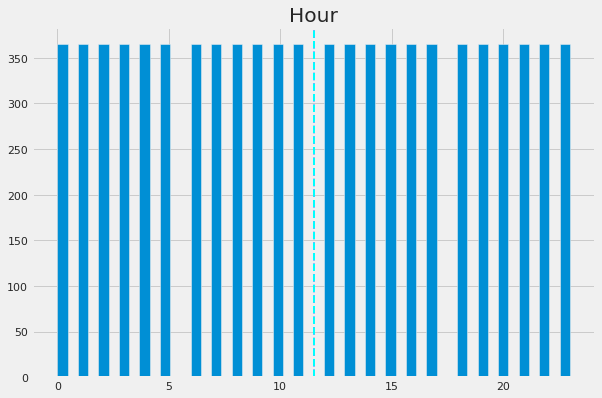

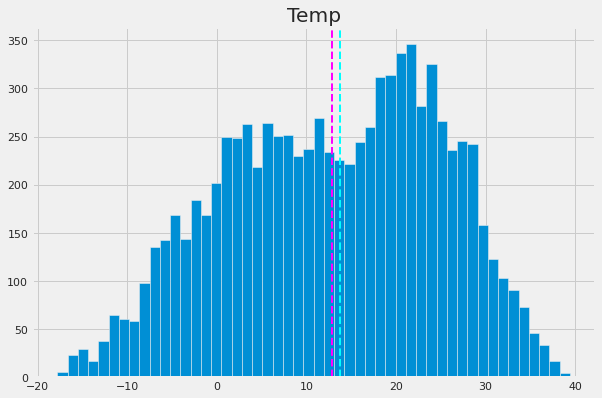

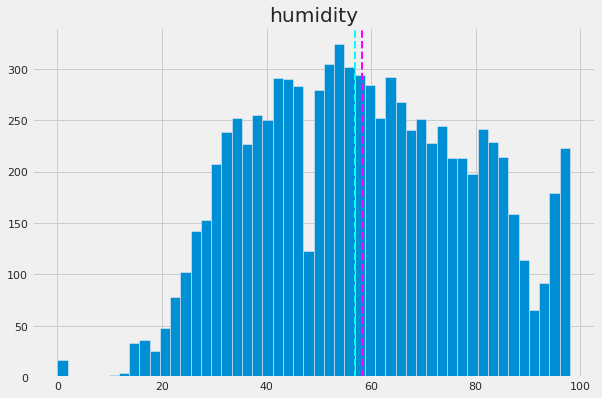

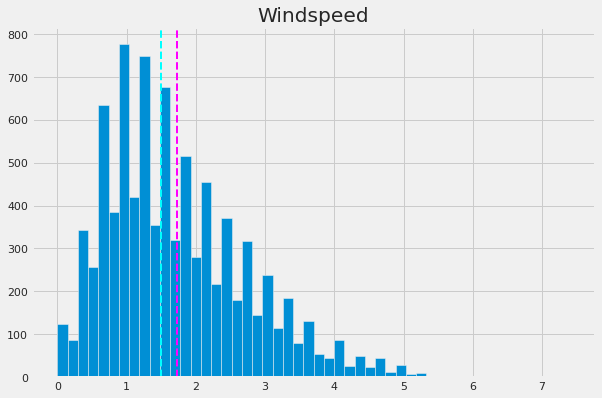

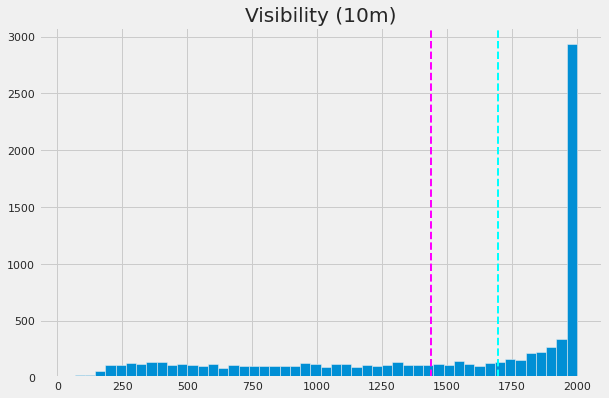

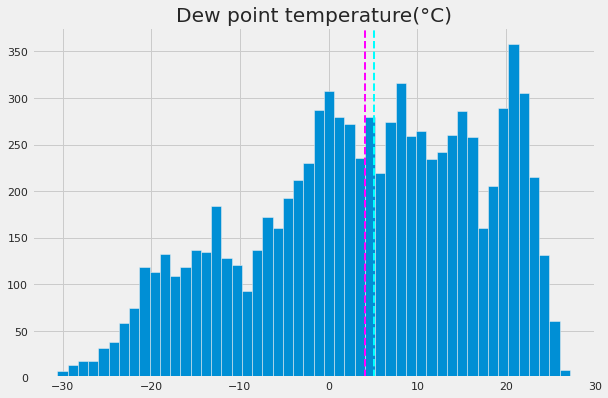

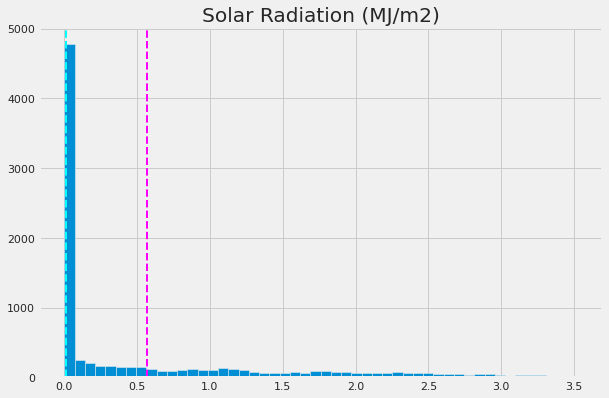

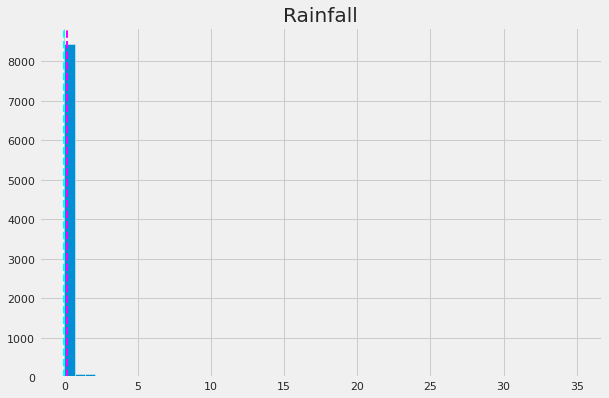

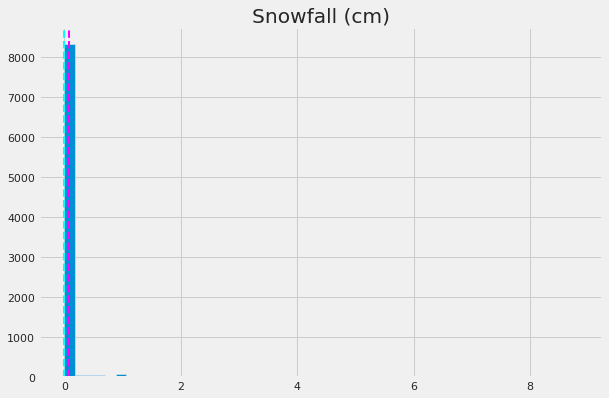

In [81]:
# Numerical Columns

numeric_features = df.iloc[:,[2,3,4,5,6,7,8,9,10]]
numeric_features.head()
# numeric_features[:].head()
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**Observations** - 


*   Distribution of columns **Hour, Temperature, Humidity** and **Dew Point temperature** seem normal.
*   Distribution of columns **Solar Radiation, Snowfall** and **Rainfall** is skwewed as the range of values is very less.



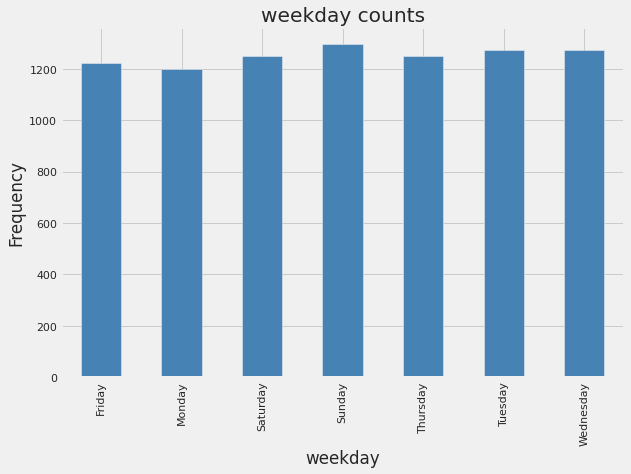

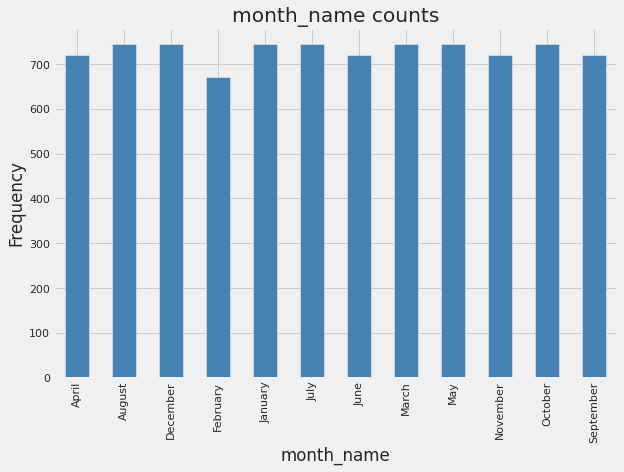

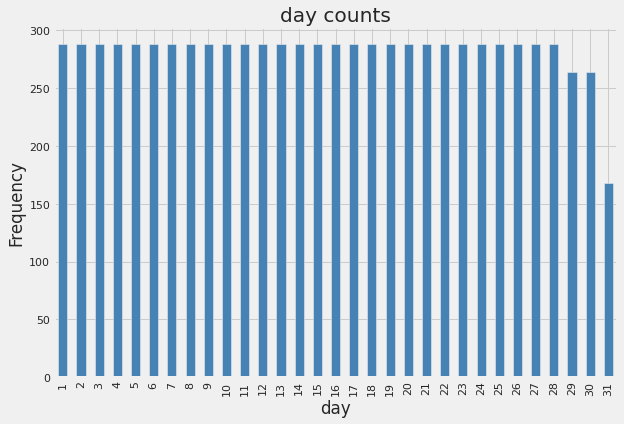

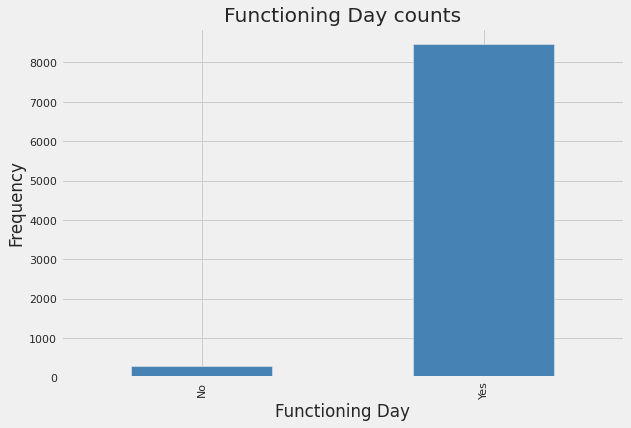

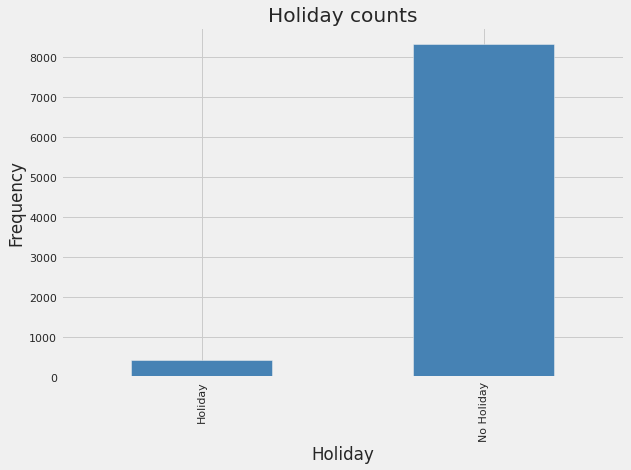

In [82]:
# Categorical Columns

categorical_features = df.iloc[:,[-1,-3,-4,-5,-6]]
categorical_features.head()

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

**Observations** - 


*   Distribution of columns **Weekday, Month** and **Day** seems normal.
*   We see similarity in the distribution of **Holiday** and **Functioning Day**. So we will check their co-relation and will drop any one of them.

## Bi-variate Analysis

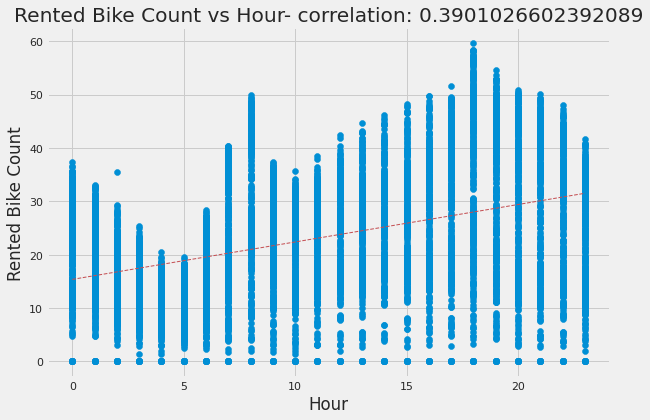

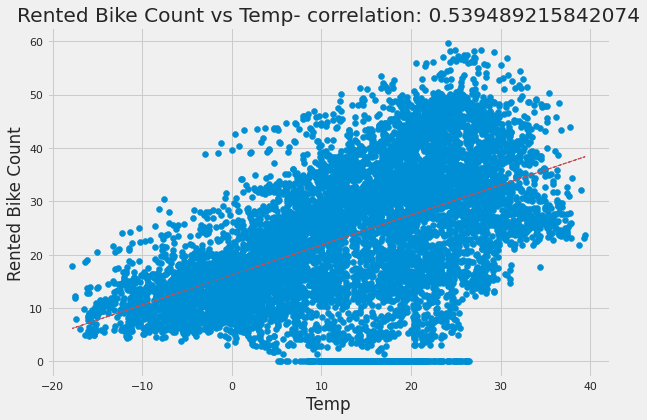

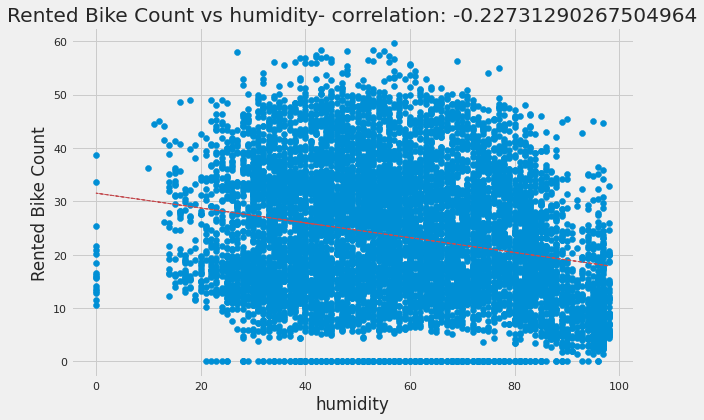

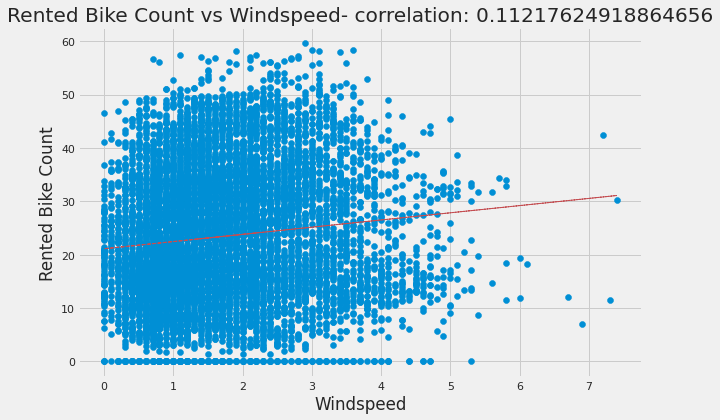

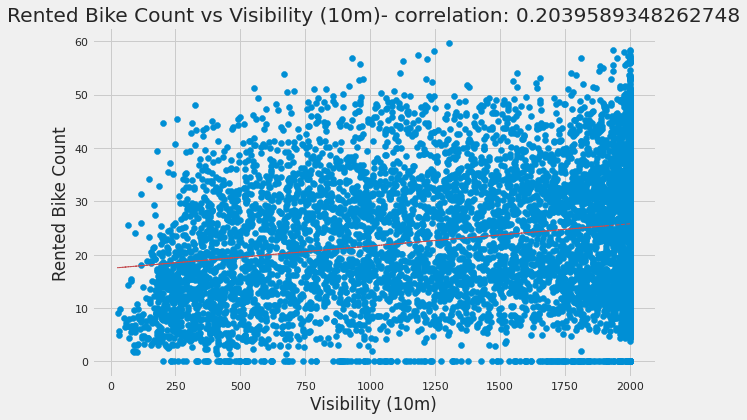

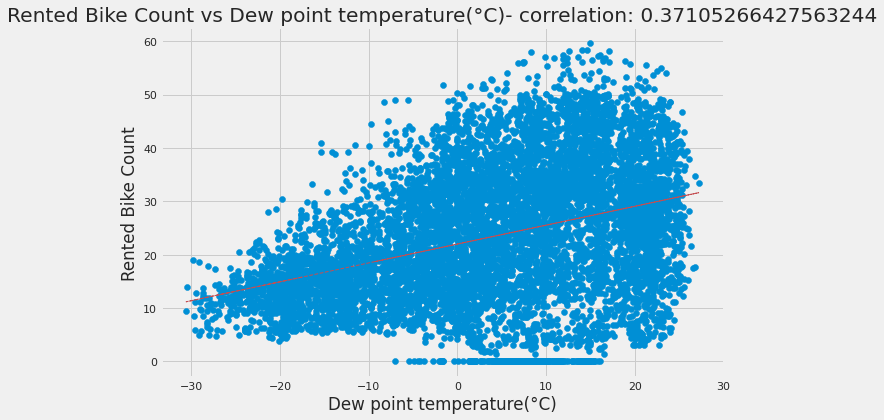

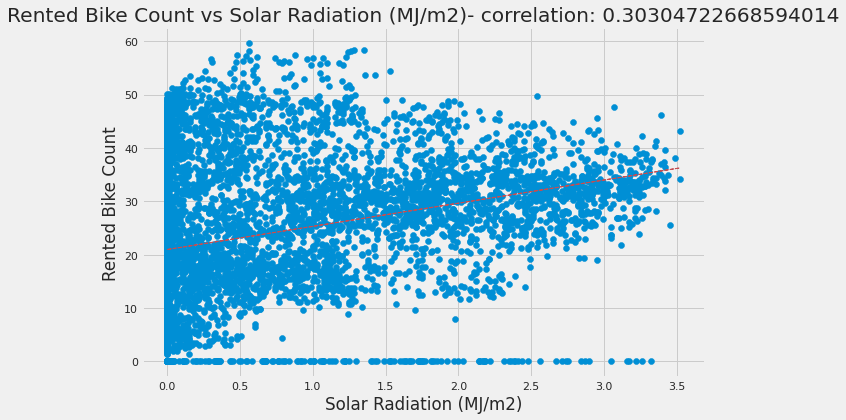

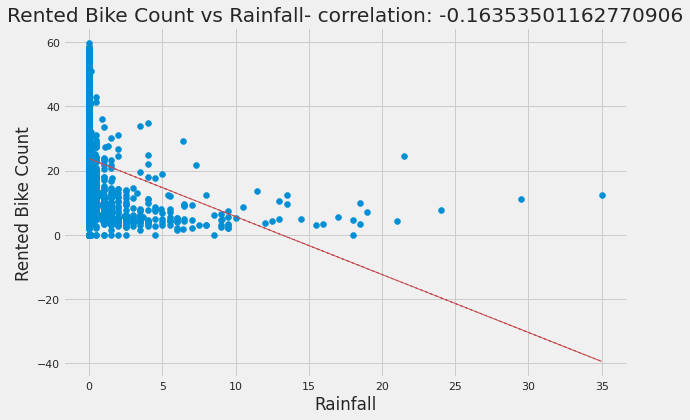

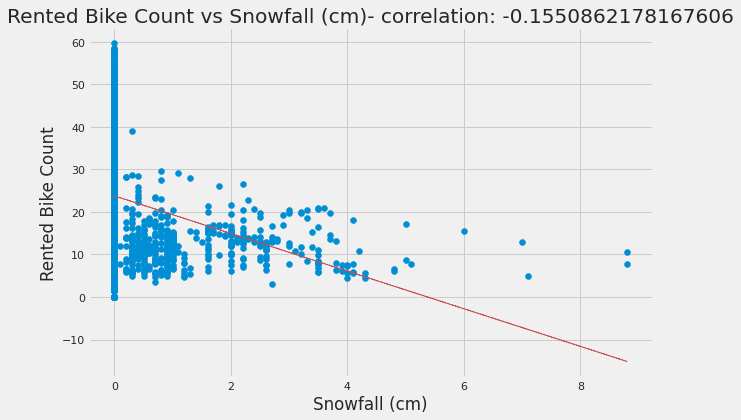

In [83]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col],df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Here we will see the relation of our dependent variable i.e. Rented Bike Count with the other numerical features.

**Observations**- 

*   Temperature, windspeed, and sun radiation all have positive relationships with our dependent variable. It is self-evident since these elements are required for a safe bike ride.
*   Rain, snow, and humidity are all conditions that make biking difficult. As a result, it reveals unfavourable associations.


##Multi-variate Analysis

We shall observe the pattern of several columns such as Weekdays, Hours, and so on, as well as their effect on our dependent variable, Rented Bike Count, in Bi-variate analysis.

**Weekdays**

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

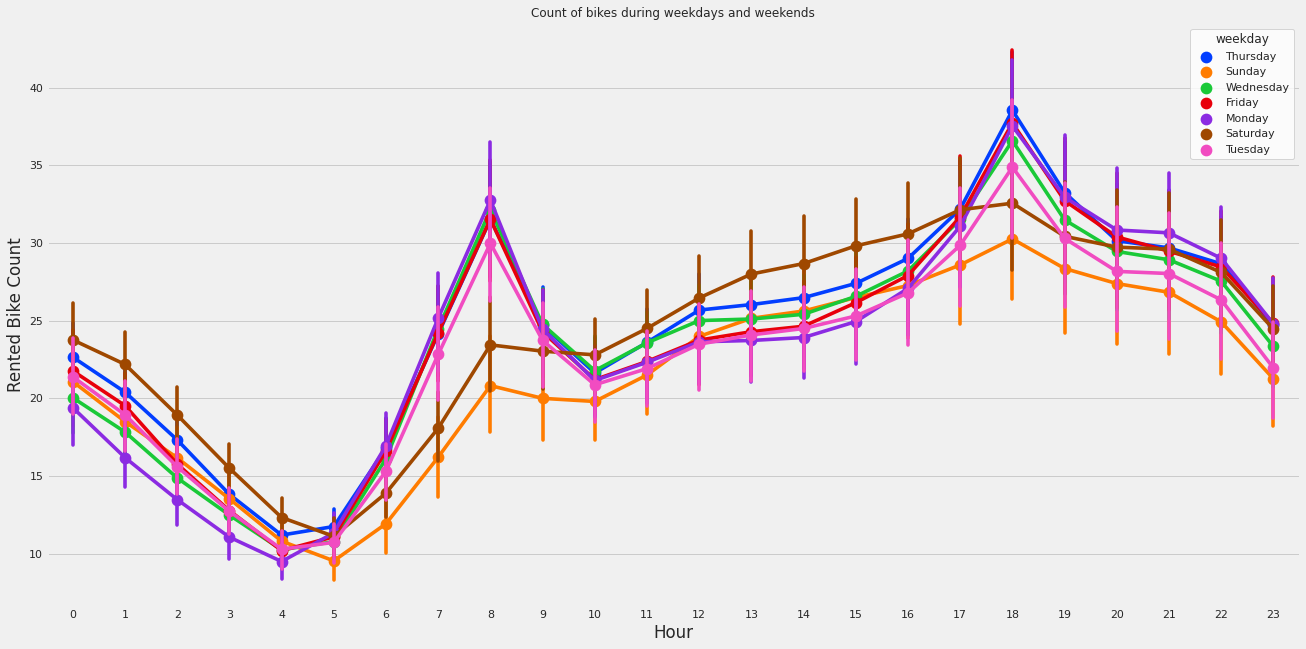

In [84]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='weekday',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

**Observations**

*   Monday, Tuesday, Wednesday, Thursday, and Friday all follow the same pattern. Between 0600 hours and 1000 hours, and between 1700 hours and 2100 hours, there were a lot of rented bikes. Due to office hours, there is a hurry and increase in frequency.
*   We saw a different trend on Saturday and Sunday. The afternoon and early evening are the most popular times for people to leave their homes. That's why we witnessed a spike in the number of people during those hours.



**Seasons**

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

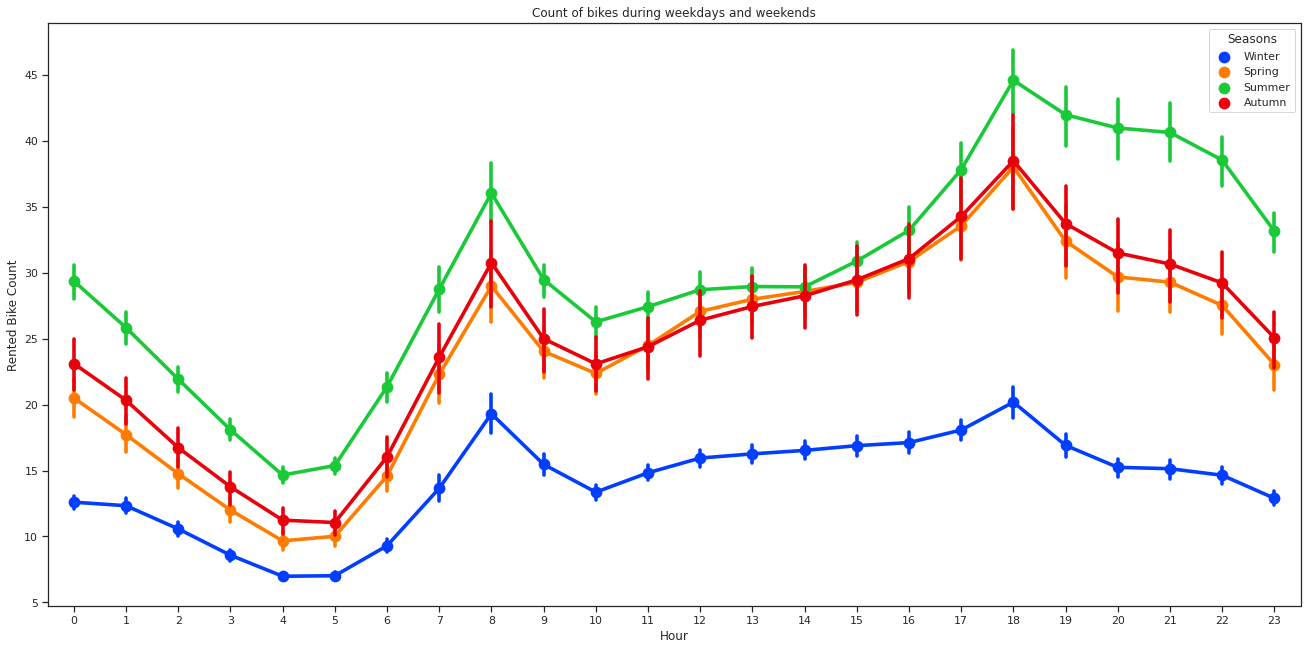

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

**Observations**

*   We can see from the graph above that people do not prefer to ride bikes in the cold. Choosing to ride a bike during the snow may not be the most practical decision.



In [86]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temp', 'humidity', 'Windspeed',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month_name', 'month', 'weekday'],
      dtype='object')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

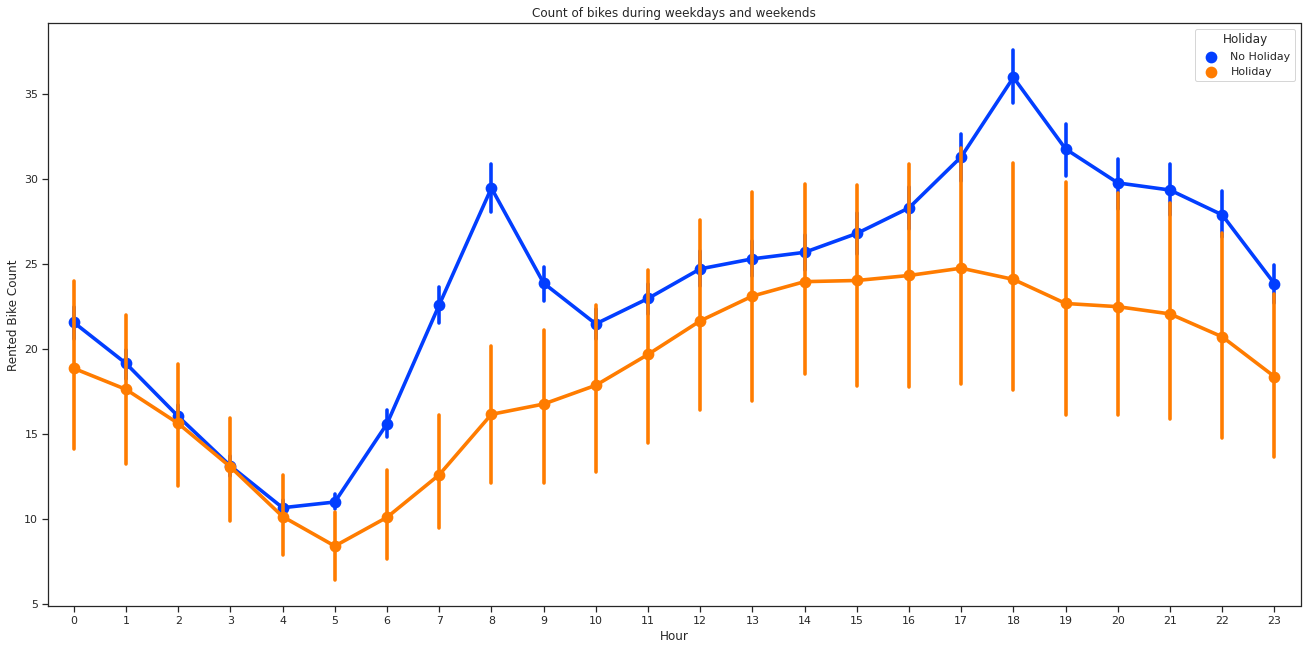

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="ticks", rc={"lines.linewidth":2 })
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday',palette = sns.color_palette('bright'), ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

**Observation** - 

*   We're seeing a similar pattern here, such as Non-holidays are Monday through Friday, whereas holidays are Saturday and Sunday.



[Text(0.5, 1.0, 'Count of bikes during different months')]

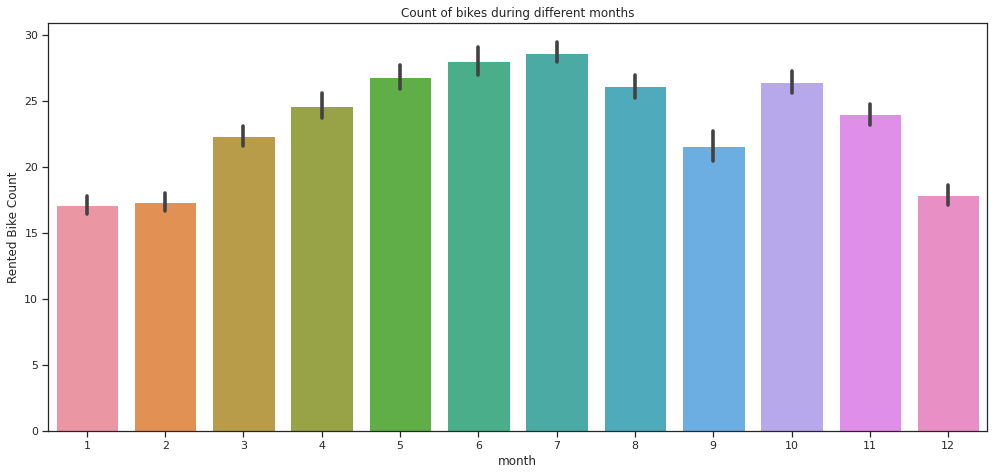

In [88]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='month', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different months')]

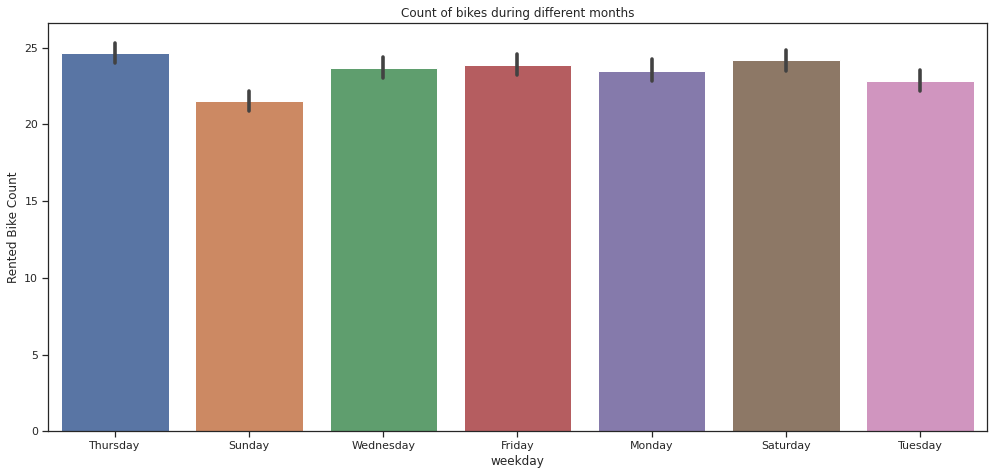

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=df, x='weekday', y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes during different months')

#**Feature Engineering**

*   As we get closer to constructing our Machine Learning model, we should look at the relationships between all of the variables, as well as between the dependent and independent variables. 


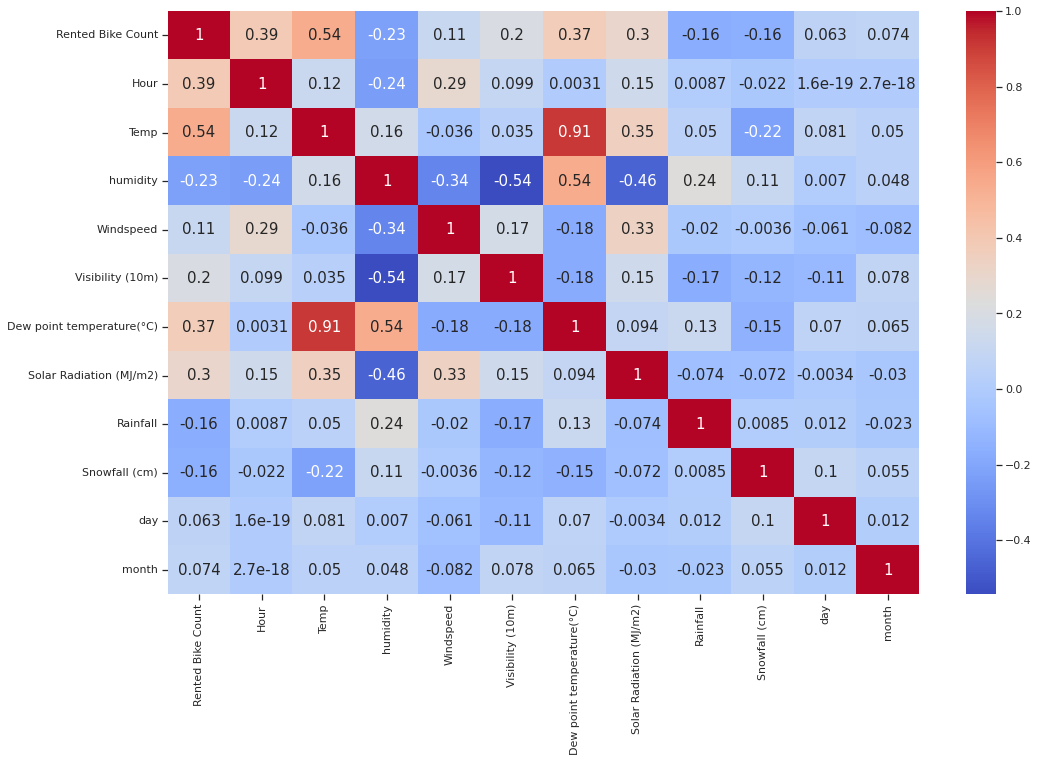

In [90]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

**Observations**

*   Because there is a strong link between temperature and dew point temperature, we may ignore any of the columns, such as dew point temperature.


*   Temperature and windspeed are also strongly associated to solar radiaiton. We'll have to drop that as well.





In [91]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temp', 'humidity', 'Windspeed',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month_name', 'month', 'weekday'],
      dtype='object')

In [92]:
# Dropping columns
drop_column = ['Date','Dew point temperature(°C)','month','Solar Radiation (MJ/m2)','month','weekday']
df = df.drop(drop_column,1)

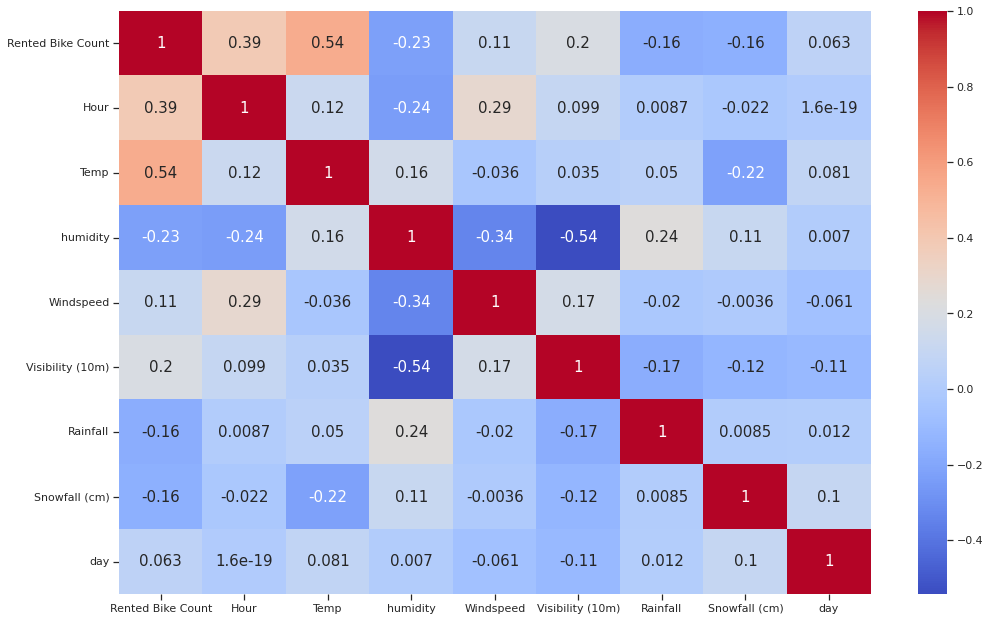

In [93]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')


*   We used One Hot Encoding to produce binary integers of 0 and 1 to encode our categorical features because categorical features that are in string format cannot be understood by the machine and needs to be converted to numerical format.





In [94]:
# One hot encoding
df = pd.get_dummies(df, columns=['Seasons','Holiday','Functioning Day','month_name','day'], prefix=["Seasons","holiday","Functioning_Day","month","day"],drop_first=True)
df.head()

,Rented Bike Count,Hour,Temp,humidity,Windspeed,Visibility (10m),Rainfall,Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_No Holiday,Functioning_Day_Yes,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



* EDA and Feature Engineering are complete. Our data is now ready to be fed 
into the models; it has all of the columns in the format that the models require.
* Before feding into the model. Data has to be divided into train and test split.


#**Test** **Train** **Split**

* We must separate the independent features, i.e., X, from the dependent features, i.e., Y.

In [95]:
X = df.drop(['Rented Bike Count'], axis = 1)
y = df['Rented Bike Count']

* Before applying any machine learning algorithm, it is always better to standardize the columns.
* Distance-based algorithm like Linear regression, KNN are  sensitive to this while Tree-based algorithm like Decision Trees, Random forest are fairly insensitive to this transformation. 

In [96]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns
ss = StandardScaler()
new_df = ss.fit_transform(X)
X = pd.DataFrame(new_df, columns=cols)

In [97]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 10) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(7008, 53)
(1752, 53)
(7008,)


* In train-test split, we have given 80% of the records to the test data and 20% of the record to the train dataset.

# **Models**

## Models Run


In model selection,we have run this dataset on four algorithms: **Linear Regression, DecisionTree Regressor, Randomforest Regressor, and XGBoost Regressor**.
Following that, we evaluated the model using key metrics such as **Mean Absolute Error, Root Mean Square, and Adjusted R2 score.**

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [99]:
Adjusted_R2_test = {}
Adjusted_R2_train = {}
MAE_train = {}
MAE_test = {}
# Model : LinearRegression(Test)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Model : LinearRegression(Test)")
print("MAE :" ,(mean_absolute_error(y_test, y_pred))**2)
MAE_test["Linear Regression"] = (mean_absolute_error(y_test, y_pred))**2
print("MSE :" , mean_squared_error(y_test, y_pred))
print("RMSE :" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 :" ,r2_score(y_test, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
Adjusted_R2_test["LinearRegression"] = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('\n')

# Model : LinearRegression(Train)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_train)
print("Model :  LinearRegression(Train)")
print("MAE :" , (mean_absolute_error(y_train, y_pred))**2)
MAE_train["Linear Regression"] = (mean_absolute_error(y_train, y_pred))**2
print("MSE :" , mean_squared_error(y_train, y_pred))
print("RMSE :" ,np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2 :" ,r2_score(y_train, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
Adjusted_R2_train["LinearRegression"] = 1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : DecisionTreeRegressor(Test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Model : DecisionTreeRegressor(Test)")
print("MAE :" ,(mean_absolute_error(y_test, y_pred))**2)
MAE_test["DecisionTree"] = (mean_absolute_error(y_test, y_pred))**2
print("MSE :" , mean_squared_error(y_test, y_pred))
print("RMSE :" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 :" ,r2_score(y_test, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
Adjusted_R2_test["DecisionTree"] = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('\n')

# Model : DecisionTreeRegressor(Train)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtr.predict(X_train)
print("Model : DecisionTreeRegressor(Train)")
print("MAE :" , (mean_absolute_error(y_train, y_pred))**2)
MAE_train["Decison Tree"] = (mean_absolute_error(y_train, y_pred))**2
print("MSE :" , mean_squared_error(y_train, y_pred))
print("RMSE :" ,np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2 :" ,r2_score(y_train, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
Adjusted_R2_train["DecisionTree"] = 1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : XGBRegressor(Test)

xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Model : XGBRegressor(Test)")
print("MAE :" ,(mean_absolute_error(y_test, y_pred))**2)
MAE_test["XGB"] = (mean_absolute_error(y_test, y_pred))**2
print("MSE :" , mean_squared_error(y_test, y_pred))
print("RMSE :" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 :" ,r2_score(y_test, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
Adjusted_R2_test["XGBRegressor"] = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('\n')

# Model : XGBRegressor(Train)

xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_train)
print("Model : XGBR(Train)")
print("MAE :" , (mean_absolute_error(y_train, y_pred))**2)
MAE_train["XGB"] = (mean_absolute_error(y_train, y_pred))**2
print("MSE :" , mean_squared_error(y_train, y_pred))
print("RMSE :" ,np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2 :" ,r2_score(y_train, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
Adjusted_R2_train["XGB"] = 1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Model : RandomForestRegressor(Test)

rf = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Model : RandomForestRegressor(Test)")
print("MAE :" ,(mean_absolute_error(y_test, y_pred))**2)
MAE_test["RandomForest"] = (mean_absolute_error(y_test, y_pred))**2
print("MSE :" , mean_squared_error(y_test, y_pred))
print("RMSE :" , np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 :" ,r2_score(y_test, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
Adjusted_R2_test["RandomForest"] = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('\n')

# Model : RandomForestRegressor(Train)

rf = RandomForestRegressor(n_estimators= 50).fit(X_train, y_train)
y_pred = rf.predict(X_train)
print("Model : RandomForestRegressor(Train)")
print("MAE :" , (mean_absolute_error(y_train, y_pred))**2)
MAE_train["RandomForest"] = (mean_absolute_error(y_train, y_pred))**2
print("MSE :" , mean_squared_error(y_train, y_pred))
print("RMSE :" ,np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2 :" ,r2_score(y_train, y_pred))
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
Adjusted_R2_train["RandomForest"] = 1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

Model : LinearRegression(Test)
MAE : 29.98679738080441
MSE : 50.3643820657739
RMSE : 7.096786742306261
R2 : 0.6776946294181957
Adjusted R2 :  0.6676344500066318


Model :  LinearRegression(Train)
MAE : 29.54126553275913
MSE : 50.06618224296554
RMSE : 7.075746055573613
R2 : 0.676106087090919
Adjusted R2 :  0.673637525488362
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Model : DecisionTreeRegressor(Test)
MAE : 10.228640235377737
MSE : 25.25032330281588
RMSE : 5.024969980290019
R2 : 0.8384113042666518
Adjusted R2 :  0.8333676052832198


Model : DecisionTreeRegressor(Train)
MAE : 0.0
MSE : 0.0
RMSE : 0.0
R2 : 1.0
Adjusted R2 :  1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[13:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152:

In [100]:
print(Adjusted_R2_test)
print(Adjusted_R2_train)

{'LinearRegression': 0.6676344500066318, 'DecisionTree': 0.8333676052832198, 'XGBRegressor': 0.8758009976600457, 'RandomForest': 0.9059004863432144}
{'LinearRegression': 0.673637525488362, 'DecisionTree': 1.0, 'XGB': 0.882624522788362, 'RandomForest': 0.9866391606179048}


## Error Plots

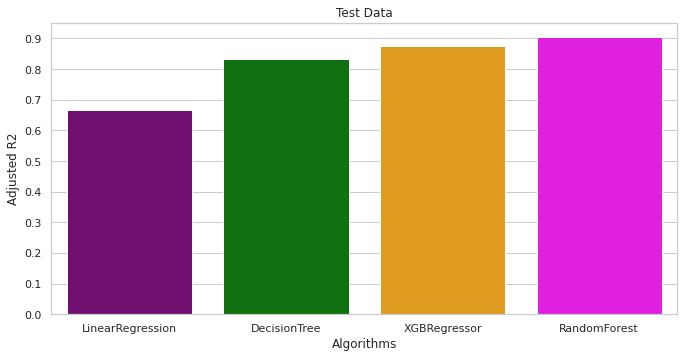

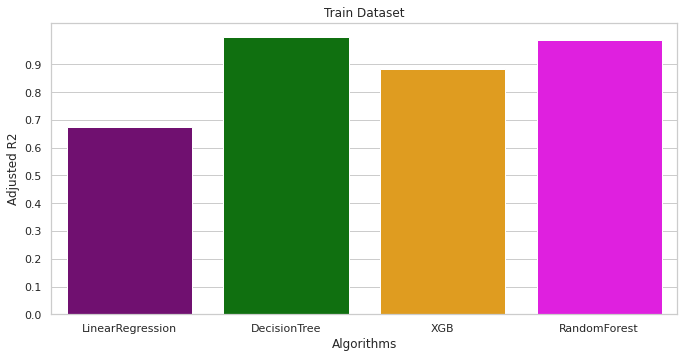

In [101]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title("Test Data")
plt.yticks(np.arange(0,1,0.10))
plt.ylabel("Adjusted R2")
plt.xlabel("Algorithms")
sns.barplot(x=list(Adjusted_R2_test.keys()), y=list(Adjusted_R2_test.values()), palette=colors)
plt.show()

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title("Train Dataset")
plt.yticks(np.arange(0,1,0.10))
plt.ylabel("Adjusted R2")
plt.xlabel("Algorithms")
sns.barplot(x=list(Adjusted_R2_train.keys()), y=list(Adjusted_R2_train.values()), palette=colors)
plt.show()

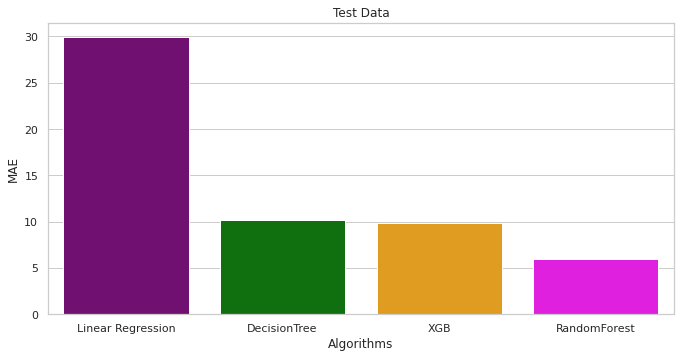

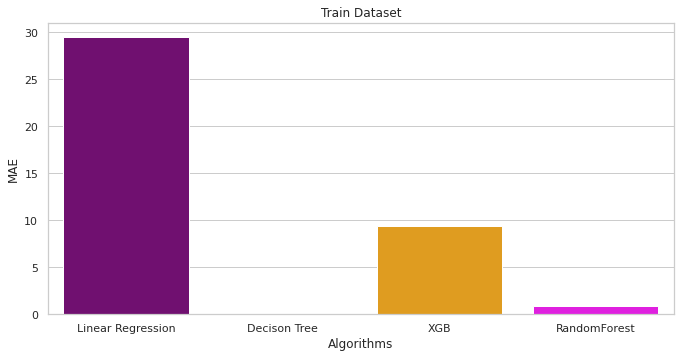

In [102]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title("Test Data")
plt.yticks(np.arange(0,50,5))
plt.ylabel("MAE")
plt.xlabel("Algorithms")
sns.barplot(x=list(MAE_test.keys()), y=list(MAE_test.values()), palette=colors)
plt.show()

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title("Train Dataset")
plt.yticks(np.arange(0,50,5))
plt.ylabel("MAE")
plt.xlabel("Algorithms")
sns.barplot(x=list(MAE_train.keys()), y=list(MAE_train.values()), palette=colors)
plt.show()

# **Hyperparamter** **Optimization**

In [103]:
xgb_h = XGBRegressor()
params = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [ 7, 10],
        'min_child_weight': [1, 3],
        'n_estimators' : [ 200, 500],
        'objective': ['reg:squarederror']
    }
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
xgb_h_regressor=GridSearchCV(xgb_h,param_grid=params,n_jobs=-1)
xgb_h_regressor.fit(X_train, y_train)
# r_s.best_params_                                                                                                                                                                           
# r_s.best_estimator_
y_pred = xgb_h_regressor.predict(X_test)
print("Model : XGBRegressor Gridsearch")
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
MAE=MAE**2
print("MAE :" , MAE)

from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model : XGBRegressor Gridsearch
MAE : 4.680984255449909
MSE : 11.248557977113744
RMSE : 3.353886995280811
R2 : 0.9280151865540645
Adjusted R2 :  0.9257683107515706


In [104]:
xgb_h_regressor.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror'}

In [105]:
xgb_h_regressor.best_estimator_

XGBRegressor(max_depth=7, n_estimators=500, objective='reg:squarederror')

## Conclusion

**Observations** -
1. We ran our dataset on four models, i.e., linear regression, decisiontree regressor, randomforest regressor, and XGBoost regressor.

2. Linear regression: we tested the model using a variety of performance metrics, and the R2 score in linear regression is 0.66, which is the lowest of all of the models. In addition, the mean absolute error is quite large, at 30. As a result, we must consider other models.

3. On training data, the random forest and the decision tree both obtain an R2 score of 1 for the decision tree and 0.98 for the random forest. As a result, we observed overfitting of the model on our training data. This is not the desired outcome.

4. With an R2 score of 0.88 on training data and 0.87 on test data, XGBoost produces the best results.


After evaluating the models on performance metrics, we settled on the XGBoost regressor. After that, we used GridsearchCV to do hyperparameter optimization and tweak our model to achieve the best possible outcome.

As a result, the importance of performance metrics has increased. which are seen below.
MAE : 4.68
MSE : 11.24
RMSE : 3.35
R2 : 0.92
Adjusted R2 :  0.92

**MAE was as low as 4.68, which is rather excellent.**


